## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [5]:
## check device
!nvidia-smi

Sat Nov 16 16:39:25 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 436.48       Driver Version: 436.48       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 960    WDDM  | 00000000:01:00.0 Off |                  N/A |
|  7%   45C    P8    11W / 130W |    187MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [7]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

In [8]:
## 資料前處理

def preproc_x(x, flatten=True):
    x = x / 255 * 2
    x -= 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [9]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [27]:
def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x) 
    model = keras.models.Model(inputs=input_layer, outputs=out)
    return model
model = build_mlp(x_train.shape[1:])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                8256

In [28]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [29]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [30]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.7403 - accuracy: 0.3777 - val_loss: 1.5691 - val_accuracy: 0.4406
Epoch 2/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.4998 - accuracy: 0.4712 - val_loss: 1.4758 - val_accuracy: 0.4853
Epoch 3/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.3767 - accuracy: 0.5159 - val_loss: 1.3827 - val_accuracy: 0.5138
Epoch 4/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.2692 - accuracy: 0.5536 - val_loss: 1.3922 - val_accuracy: 0.5203
Epoch 5/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.1722 - accuracy: 0.5893 - val_loss: 1.3523 - val_accuracy: 0.5352
Epoch 6/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.0796 - accuracy: 0.6224 - val_loss: 1.3311 - val_accuracy: 0.5436
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 6s 121us/step - loss: 0.0819 - accuracy: 0.9747 - val_loss: 2.9552 - val_accuracy: 0.5390
Epoch 56/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 3.1014 - val_accuracy: 0.5542
Epoch 57/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.0739 - accuracy: 0.9778 - val_loss: 3.0932 - val_accuracy: 0.5495
Epoch 58/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.0671 - accuracy: 0.9796 - val_loss: 3.3758 - val_accuracy: 0.5522
Epoch 59/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 3.2406 - val_accuracy: 0.5456
Epoch 60/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.0736 - accuracy: 0.9780 - val_loss: 3.4289 - val_accuracy: 0.5493
Epoch 61/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.0716 - accuracy: 0.9782 - val

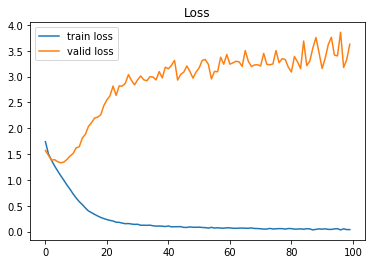

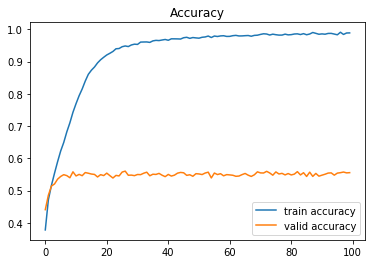

In [32]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()